# Workspace settings

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import print_function
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from random import sample, randint
batch_size = 1000
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 32, 32
channels=3
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Import data

In [81]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], channels, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], channels, img_rows, img_cols)
    input_shape= (channels, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
    input_shape = (img_rows, img_cols, channels)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Visualize Data

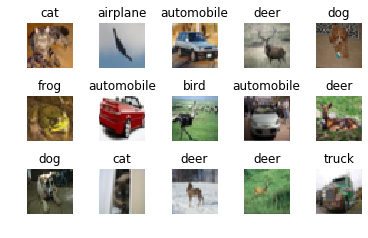

In [82]:
def draw_sample(X, y, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        n=randint(0,x_train.shape[0]-1000)
        plt.subplot(rows, cols, i+1)
        img = X[n+i].reshape(input_shape)
        if not (img.ndim == 2 or img.ndim == 3 and img.shape[-1] in [3, 4]):
          img=img.reshape(img_rows,img_cols)
        plt.imshow(img, cmap='gray' if channels==1 else "gnuplot")
        plt.title("{}".format(class_names[np.argmax(y[n+i])]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

draw_sample(x_train, y_train, 3, 5)

# Make model

In [83]:
model = keras.Sequential(name="CIFAR_CNN")
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape, padding="same", kernel_constraint=keras.constraints.max_norm(3.)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "CIFAR_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               7373312   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               26

# Run model

In [84]:
H=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 153us/sample - loss: 1.9633 - accuracy: 0.2748 - val_loss: 1.5603 - val_accuracy: 0.4516
Epoch 2/30
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5168 - accuracy: 0.4522 - val_loss: 1.2917 - val_accuracy: 0.5300
Epoch 3/30
50000/50000 [==============================] - 7s 135us/sample - loss: 1.3002 - accuracy: 0.5365 - val_loss: 1.1517 - val_accuracy: 0.5931
Epoch 4/30
50000/50000 [==============================] - 7s 135us/sample - loss: 1.1474 - accuracy: 0.5975 - val_loss: 1.0509 - val_accuracy: 0.6303
Epoch 5/30
50000/50000 [==============================] - 7s 135us/sample - loss: 1.0409 - accuracy: 0.6401 - val_loss: 0.9921 - val_accuracy: 0.6520
Epoch 6/30
50000/50000 [==============================] - 7s 136us/sample - loss: 0.9333 - accuracy: 0.6804 - val_loss: 0.9526 - val_accuracy: 0.6694
Epoch 7/30
50000/50000 [==========================

# Evaluate Model

In [85]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5618397547721863
Test accuracy: 0.7091


# Make Predictions

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.75      0.74      0.74      1000
  automobile       0.85      0.79      0.82      1000
        bird       0.68      0.52      0.59      1000
         cat       0.52      0.53      0.53      1000
        deer       0.66      0.65      0.65      1000
         dog       0.65      0.58      0.61      1000
        frog       0.73      0.83      0.78      1000
       horse       0.70      0.81      0.75      1000
        ship       0.80      0.83      0.81      1000
       truck       0.75      0.82      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



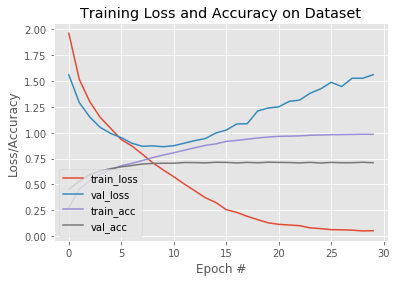

In [86]:
predictions = model.predict(x_test)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
	target_names=class_names))
 
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

# Display data

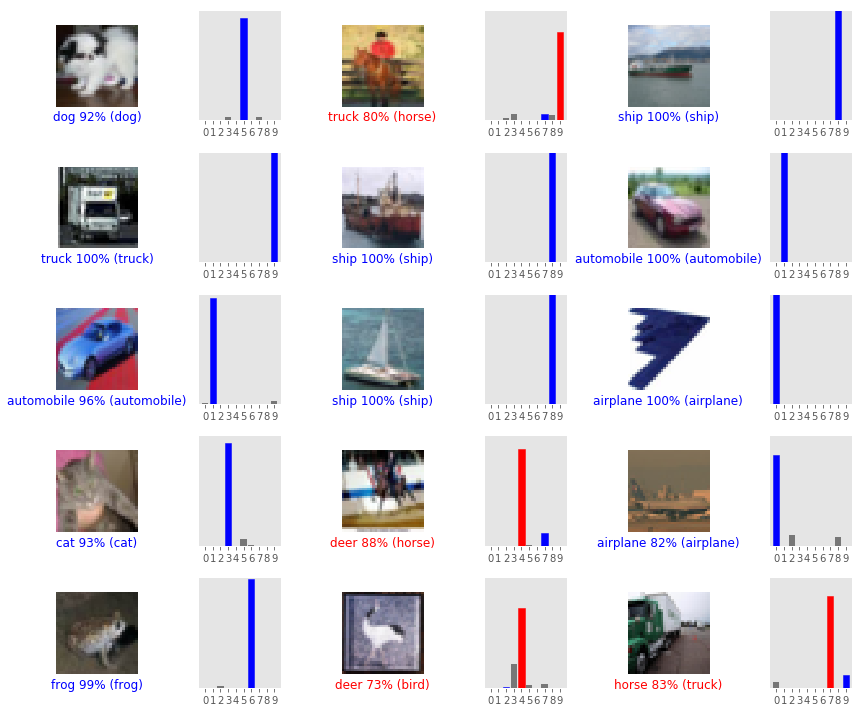

In [87]:
def plot_image(i, predictions_array, true_label, img):
    prediction, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if not (img.ndim == 2 or img.ndim == 3 and img.shape[-1] in [3, 4]):
      img=img.reshape(img_rows,img_cols)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    true_label=np.argmax(true_label)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(prediction),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    prediction, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)
    true_label = np.argmax(true_label)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
index=0
for i in sample(range(x_test.shape[0]), num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * index + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * index + 2)
    plot_value_array(i, predictions, y_test)
    index+=1
plt.tight_layout()
plt.show()
